In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['font.size'] = 12
import os
import cv2
from tqdm import tqdm
from skimage.feature import local_binary_pattern
from PIL import Image, ImageFilter
from datetime import datetime
import skimage.measure

In [ ]:
#DATADIR = "/home/14mcpc21/MarsGPU/dataset_splicing_4000/"
DATADIR = "/content/drive/MyDrive/COVID_CLAHE AUGM"

CATEGORIES = ["COV", "no_finding"]

training_data = []

def create_training_data():
    training_start = datetime.now()
    for category in CATEGORIES:  # do Normal and covid-19

        path = os.path.join(DATADIR,category)  # create path to Normal and covid-19

        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Normal  1= Covid-19

        for img in tqdm(os.listdir(path)):  # iterate over each image per Normal and covid-19

            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                # convert the image to HSV color-spac
                #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                image = cv2.cvtColor(img_array, cv2.COLOR_BGR2YCR_CB)
                yi,cr,cb = cv2.split(image)
                #cv2.imwrite('yi_output.png',yi)
                #im = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                #h,s,v = cv2.split(im)
                a= 1.1 #where a is a constant slightly larger than 1, used to avoid the resulting image being too bright
                t = 0.05 #a small positive number used to avoid being divided by zero
                #max_bgr = np.maximum(np.maximum(h,s),v)
                #max_y = np.maximum(np.maximum(yi,cr),cb) 
                im = Image.fromarray(cr)
                # applying the max filter 
                maxv = im.filter(ImageFilter.MaxFilter(size = 9)) 
                # applying the min filter 
                minv = maxv.filter(ImageFilter.MinFilter(size = 9))
                im_max = np.array(minv, dtype='float32')
                L = a*(im_max+t)
                ill = np.array(L, dtype='uint8')
                #l_ill =[L.mean(),L.var()]
                #ill = np.array(l_ill, dtype='uint8')
    
                #max_p = skimage.measure.block_reduce(yi, (3,3), np.max)

    
    
    
    
                lbp_ill = local_binary_pattern(ill, 32, 3, 'uniform')
                lbp_illl = np.array(lbp_ill, 'uint8')
                cv2.imwrite('lbp_features.png',ill)
            
                #lbp_v = local_binary_pattern(v, 32, 3, 'uniform')
                #lbp_vv = np.array(lbp_v, 'uint8')
                lbp_cr = local_binary_pattern(cr, 32, 3, 'uniform')
                lbp_cb = local_binary_pattern(cb, 32, 3, 'uniform')
                lbp_cr = np.array(lbp_cr, 'uint8')
                lbp_cb = np.array(lbp_cb, 'uint8')
                #lbp_ref = local_binary_pattern(ref, 32, 3, 'uniform')
                #lbp_reff = np.array(lbp_ref, 'uint8')
    
    
                #Illumination and color Histograms
                #hist1  = cv2.calcHist([ill], [0], None, [256], [0, 256])
                #hist2  = cv2.calcHist([v], [0], None, [256], [0, 256])
                #hist3  = cv2.calcHist([cr], [0], None, [256], [0, 256])
                #hist4  = cv2.calcHist([cb], [0], None, [256], [0, 256])
                #LBPs Histograns
                hist5 = cv2.calcHist([lbp_illl], [0], None, [7], [0, 25])
                #hist6  = cv2.calcHist([lbp_vv], [0], None, [40], [0, 40])
                hist7  = cv2.calcHist([lbp_cr], [0], None, [10], [0, 25])
                hist8  = cv2.calcHist([lbp_cb], [0], None, [8], [0, 25])
                #hist9  = cv2.calcHist([lbp_reff], [0], None, [256], [0, 256])
                #hist10  = cv2.calcHist([ref], [0], None, [256], [0, 256])
    
    
    
   

   
                # normalize the histogram
                 #cv2.normalize(hist1, hist1)
                #hs1 = hist1.flatten()
  
                cv2.normalize(hist5, hist5)
                hs5 = hist5.flatten()
                '''
                cv2.normalize(hist2, hist2)
                hs2 = hist2.flatten()
                cv2.normalize(hist3, hist3)
                 hs3 = hist3.flatten()
                 cv2.normalize(hist4, hist4)
                hs4 = hist4.flatten()
                #LBPs
                cv2.normalize(hist5, hist5)
                hs5 = hist5.flatten()
                cv2.normalize(hist6, hist6)
                 hs6 = hist6.flatten()
                '''
                cv2.normalize(hist7, hist7)
                hs7 = hist7.flatten()
                cv2.normalize(hist8, hist8)
                hs8 = hist8.flatten()
                #cv2.normalize(hist9, hist9)
                #hs9 = hist8.flatten()
                #cv2.normalize(hist10, hist10)
                 #hs10 = hist10.flatten()
    
    
                fall = np.concatenate((hs5,hs7,hs8))
    
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data si
                training_data.append([fall, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    training_end = datetime.now()
    print('Feature Extraction Time: {}'.format(training_end - training_start))

create_training_data()

100%|██████████| 1670/1670 [59:16<00:00,  2.13s/it]

Feature Extraction Time: 2:10:00.089224


In [ ]:
len(training_data)

3340

In [ ]:
import random

random.shuffle(training_data)

#Our training_data is a list, meaning it's mutable, so it's now nicely shuffled. 
#We can confirm this by iterating over a few of the initial samples and printing out the class.

for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
1
1
1
1
1


In [ ]:
savef = np.array(training_data)
save_array = np.save('ill_lbp_features_4117.npy', savef)
#training_data = np.load('ill_lbp_features_4117.npy')

In [ ]:
training_data = np.load('ill_lbp_features_4117.npy',  allow_pickle=True)

In [ ]:
fx = []
fy = []

for features,label in training_data:
    fx.append(features)
    fy.append(label)

In [ ]:
print('feature vector size :',len(fx[0]))

feature vector size : 25


In [ ]:
feature_matrix = np.array(fx)
feature_matrix.shape

(3340, 25)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix,fy,test_size=.3,random_state=0)

In [ ]:
#all classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


training_start = datetime.now()
# define support vector classifiers
lr = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
n_bayes = GaussianNB()
svm = SVC(kernel='linear', probability=True,degree=3, gamma='auto')
svm2 = SVC(kernel='rbf')

# fit model
lr.fit(X_train, y_train)
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
#lda.fit(X_train, y_train)
n_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)
svm2.fit(X_train, y_train)

training_end = datetime.now()
print('Training Duration: {}'.format(training_end - training_start))



Training Duration: 0:00:00.120259


In [ ]:
from sklearn.metrics import accuracy_score,roc_curve, auc,confusion_matrix,classification_report

#y_true = [1, 1, 0, 0]
#y_pred = [1, 0, 1, 0]   

#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#print(tn, fp, fn, tp)  # 1 1 1 1

#10. Score model

#Predictions are calculated on the test data, followed by the accuracy.

pred_start = datetime.now()
# generate predictions
lr_pred = lr.predict(X_test)
tree_pred = tree.predict(X_test)
knn_pred = knn.predict(X_test)
#lda_pred = lda.predict(X_test)
n_bayes_pred = n_bayes.predict(X_test)
svm_pred = svm.predict(X_test)
svm2_pred = svm2.predict(X_test)

pred_end = datetime.now()
print('Prediction Duration: {}'.format(pred_end- pred_start))

# calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
tree_accuracy = accuracy_score(y_test, tree_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
#lda_accuracy = accuracy_score(y_test, lda_pred)
n_bayes_accuracy = accuracy_score(y_test, n_bayes_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm2_accuracy = accuracy_score(y_test, svm2_pred)

print('############# Tp,Tn,Fp,Fn ##################')
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
print('Logistic R','tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, tree_pred).ravel()
print('Tree','tn:',tn1, 'fp:',fp1, 'fn:',fn1, 'tp:',tp1)
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, knn_pred).ravel()
print('knn','tn:',tn2, 'fp:',fp2, 'fn:',fn2, 'tp:',tp2)
#tn3, fp3, fn3, tp3 = confusion_matrix(y_test, lda_pred).ravel()
#print('lda','tn:',tn3, 'fp:',fp3, 'fn:',fn3, 'tp:',tp3)
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, n_bayes_pred).ravel()
print('Nbayes','tn:',tn4, 'fp:',fp4, 'fn:',fn4, 'tp:',tp4)
tn5, fp5, fn5, tp5 = confusion_matrix(y_test, svm_pred).ravel()
print('svm linear','tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)
tn6, fp6, fn6, tp6 = confusion_matrix(y_test, svm2_pred).ravel()
print('svm rbf','tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)

target_names = ['Tumurous', 'Nontumurous']
print('############# Classification Report ##################')
print('Logistic R report',classification_report(y_test, lr_pred,target_names=target_names))
print('############# Classification Report ##################')
print('Tree  report',classification_report(y_test, tree_pred,target_names=target_names))
print('############# Classification Report ##################')
print('KNN report',classification_report(y_test, knn_pred,target_names=target_names))
print('############# Classification Report ##################')
#print('LDA report',classification_report(y_test, lda_pred,target_names=target_names))
print('############# Classification Report ##################')
print('Nbayes report',classification_report(y_test, n_bayes_pred,target_names=target_names))
print('############# Classification Report ##################')
print('SVM -linear report',classification_report(y_test, svm_pred,target_names=target_names))
print('############# Classification Report ##################')
print('svm -rbf report',classification_report(y_test, svm2_pred,target_names=target_names))
      


print('############# Accuracy ##################')
print('LogisticRegression Model accuracy is: ', lr_accuracy)
print('Tree Model accuracy is: ', tree_accuracy)
print('KNN Model accuracy is: ', knn_accuracy)
#print('LDA Model accuracy is: ', lda_accuracy)
print('NBayes Model accuracy is: ', n_bayes_accuracy)
print('SVM Model accuracy (kernel = linear)) is: ', svm_accuracy)
print('SVM Model accuracy (kernel = rbf)is: ', svm2_accuracy)

Prediction Duration: 0:00:00.226987
############# Tp,Tn,Fp,Fn ##################
Logistic R tn: 0 fp: 21 fn: 0 tp: 981
Tree tn: 21 fp: 0 fn: 0 tp: 981
knn tn: 21 fp: 0 fn: 0 tp: 981
Nbayes tn: 21 fp: 0 fn: 0 tp: 981
svm linear tn: 0 fp: 21 fn: 0 tp: 981
svm rbf tn: 0 fp: 21 fn: 0 tp: 981
############# Classification Report ##################
Logistic R report               precision    recall  f1-score   support

    Tumurous       0.00      0.00      0.00        21
 Nontumurous       0.98      1.00      0.99       981

    accuracy                           0.98      1002
   macro avg       0.49      0.50      0.49      1002
weighted avg       0.96      0.98      0.97      1002

############# Classification Report ##################
Tree  report               precision    recall  f1-score   support

    Tumurous       1.00      1.00      1.00        21
 Nontumurous       1.00      1.00      1.00       981

    accuracy                           1.00      1002
   macro avg       1.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

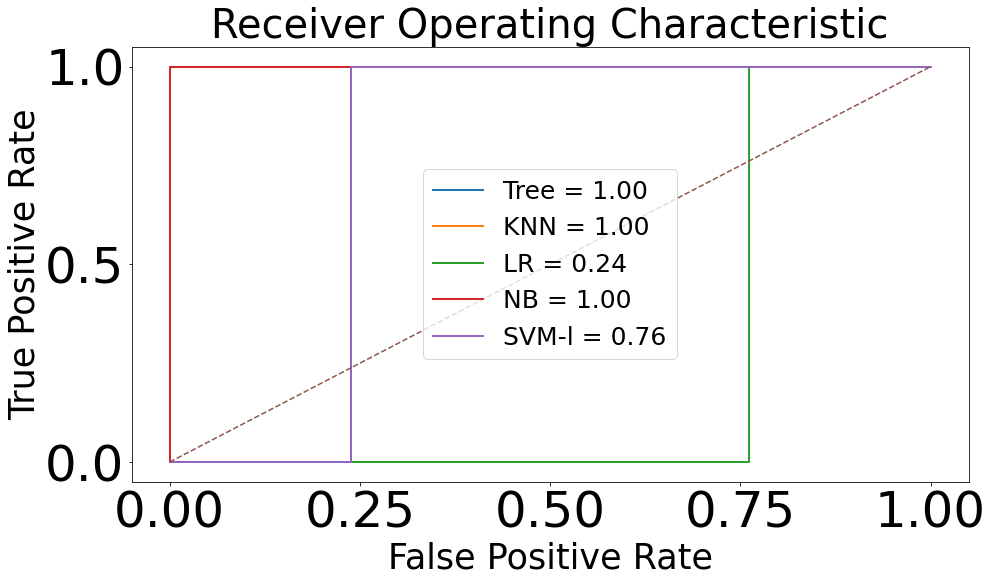

In [ ]:
#1. ROC curve + AUC

#The svm.predict_proba was used to get the probability that each class is the true label. The model predicts there is a 64% chance the bee in the image is an Apis.

# predict probabilities for X_test using predict_proba
#1. ROC curve + AUC

#The svm.predict_proba was used to get the probability that each class is the true label. The model predicts there is a 64% chance the bee in the image is an Apis.

# predict probabilities for X_test using predict_proba
#probabilities = svm.predict_proba(X_test)

# generate predictions
lr_pred = lr.predict_proba(X_test)
tree_pred = tree.predict_proba(X_test)
knn_pred = knn.predict_proba(X_test)
#lda_pred = lda.predict_proba(X_test)
n_bayes_pred = n_bayes.predict_proba(X_test)
svm_pred = svm.predict_proba(X_test)


# select the probabilities for label 1.0
#y_proba = probabilities[:, 1]
lr_proba = lr_pred[:, 1]
tree_proba = tree_pred[:, 1]
knn_proba = knn_pred[:, 1]
#lda_proba = lda_pred[:, 1]
n_bayes_proba = n_bayes_pred[:, 1]
svm_proba = svm_pred[:, 1]

# calculate false positive rate and true positive rate at different thresholds
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tree_proba, pos_label=1)
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, knn_proba, pos_label=1)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test, lr_proba, pos_label=1)
#false_positive_rate3, true_positive_rate3, thresholds3 = roc_curve(y_test, lda_proba, pos_label=1)
false_positive_rate4, true_positive_rate4, thresholds4 = roc_curve(y_test, n_bayes_proba, pos_label=1)
false_positive_rate5, true_positive_rate5, thresholds5 = roc_curve(y_test, svm_proba, pos_label=1)


# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
#roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
roc_auc4 = auc(false_positive_rate4, true_positive_rate4)
roc_auc5 = auc(false_positive_rate5, true_positive_rate5)


fig = plt.figure(figsize=(15, 8))

plt.title('Receiver Operating Characteristic', fontsize=40)
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,true_positive_rate,label='Tree = {:0.2f}'.format(roc_auc),linewidth=2)
roc_plot1 = plt.plot(false_positive_rate1,true_positive_rate1,label='KNN = {:0.2f}'.format(roc_auc1),linewidth=2)
roc_plot2 = plt.plot(false_positive_rate2,true_positive_rate2,label='LR = {:0.2f}'.format(roc_auc2),linewidth=2)
#roc_plot3 = plt.plot(false_positive_rate3,true_positive_rate3,label='LDA = {:0.2f}'.format(roc_auc3),linewidth=2)
roc_plot4 = plt.plot(false_positive_rate4,true_positive_rate4,label='NB = {:0.2f}'.format(roc_auc4),linewidth=2)
roc_plot5 = plt.plot(false_positive_rate5,true_positive_rate5,label='SVM-l = {:0.2f}'.format(roc_auc5),linewidth=2)


plt.legend(loc=0, fontsize='25')
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate', fontsize=35)
plt.xlabel('False Positive Rate', fontsize=35)
plt.show()

fig.savefig('newTest.png')


In [ ]:
#import matplotlib.pyplot as plt

#from sklearn.metrics import plot_confusion_matrix


#plot_confusion_matrix(knn, X_test, y_test,  cmap='Blues', values_format='d')  
#plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#from sklearn.metrics import plot_confusion_matrix
#plt.rcParams['figure.figsize']=10,10
#plt.rcParams['font.size'] = 50

#plot_confusion_matrix(svm, X_test, y_test,  cmap='Blues', values_format='d')  
#plt.xlabel('Covid-infected', fontsize=30)
#plt.ylabel('Normal lungs', fontsize=30)
#plt.show()

# **LR**

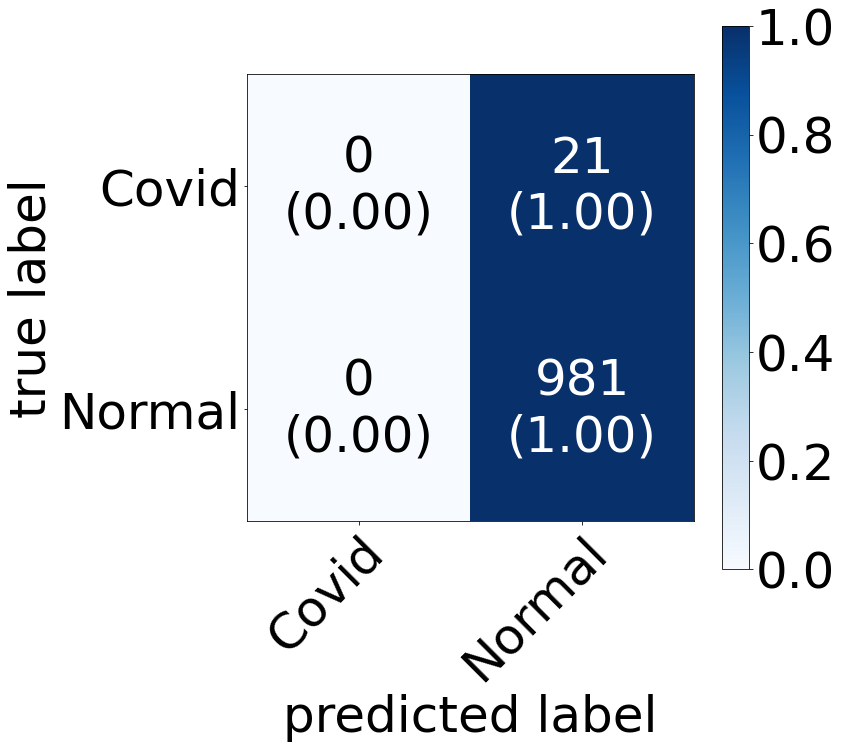

In [ ]:
# Imports

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import plot_confusion_matrix 
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.size']=50

# Your Confusion Matrix
cm = np.array([[tn, fp],
               [fn, tp]])
#tn4, fp4, fn4, tp4
# Classes
classes = ['Covid', 'Normal']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

## **TREE**

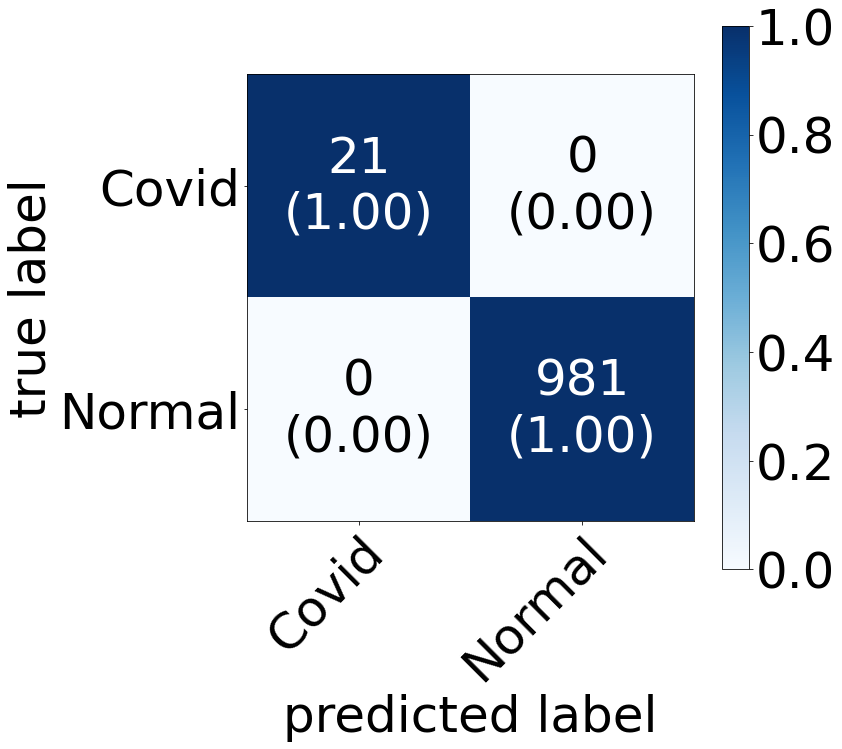

In [ ]:
# Imports

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import plot_confusion_matrix 
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.size']=50

# Your Confusion Matrix
cm = np.array([[tn1, fp1],
               [fn1, tp1]])
#tn4, fp4, fn4, tp4
# Classes
classes = ['Covid', 'Normal']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

## **KNN**

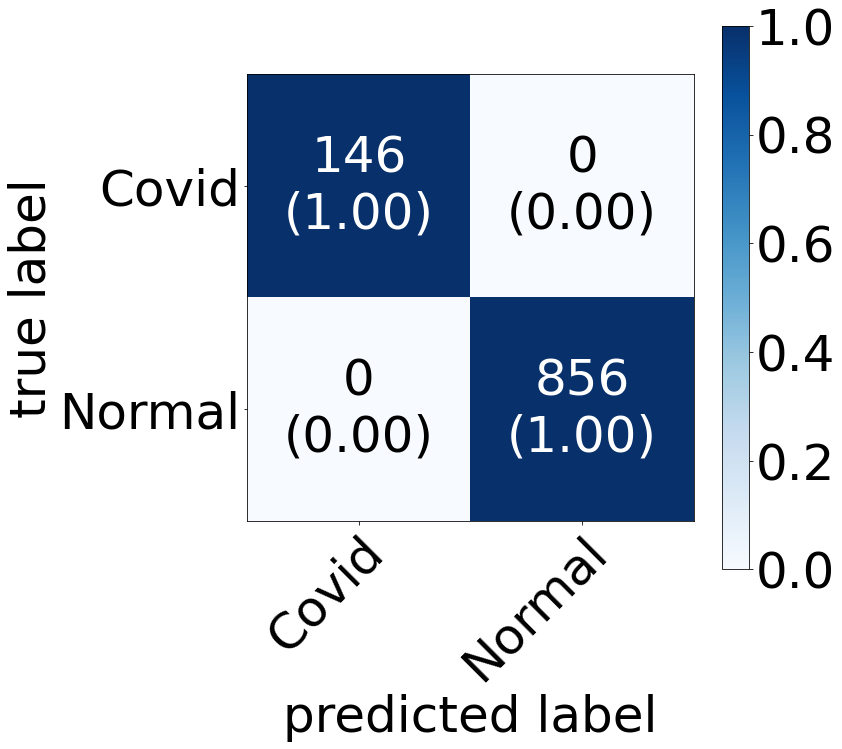

In [ ]:
# Imports

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import plot_confusion_matrix 
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.size']=50

# Your Confusion Matrix
cm = np.array([[tn2, fp2],
               [fn2, tp2]])
#tn4, fp4, fn4, tp4
# Classes
classes = ['Covid', 'Normal']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

## **NBAYES COFM**

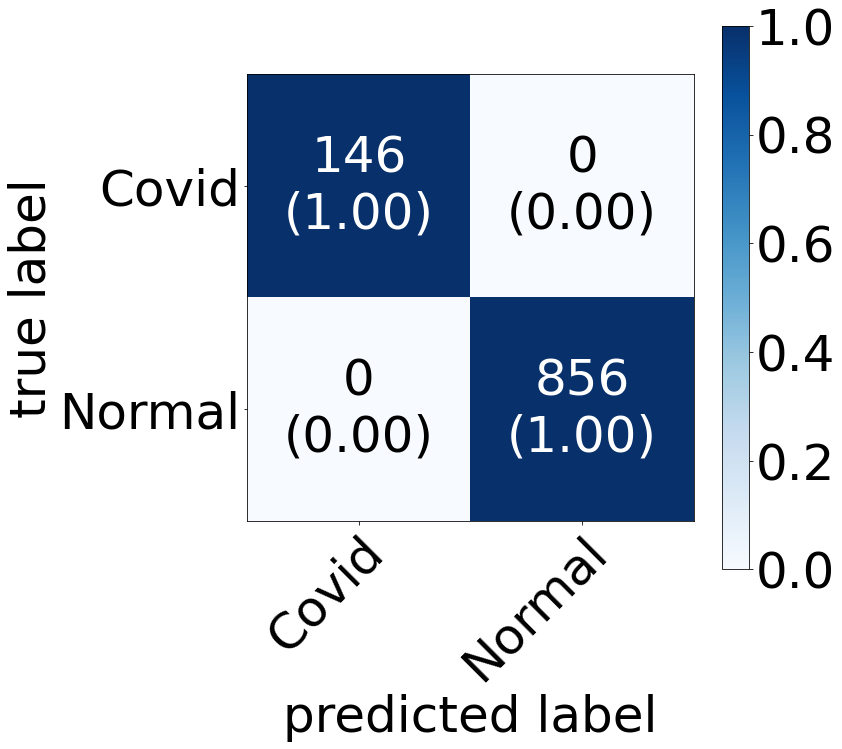

In [ ]:
# Imports

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import plot_confusion_matrix 
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.size']=50

# Your Confusion Matrix
cm = np.array([[tn4, fp4],
               [fn4, tp4]])
#tn4, fp4, fn4, tp4
# Classes
classes = ['Covid', 'Normal']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

### **SVM1**

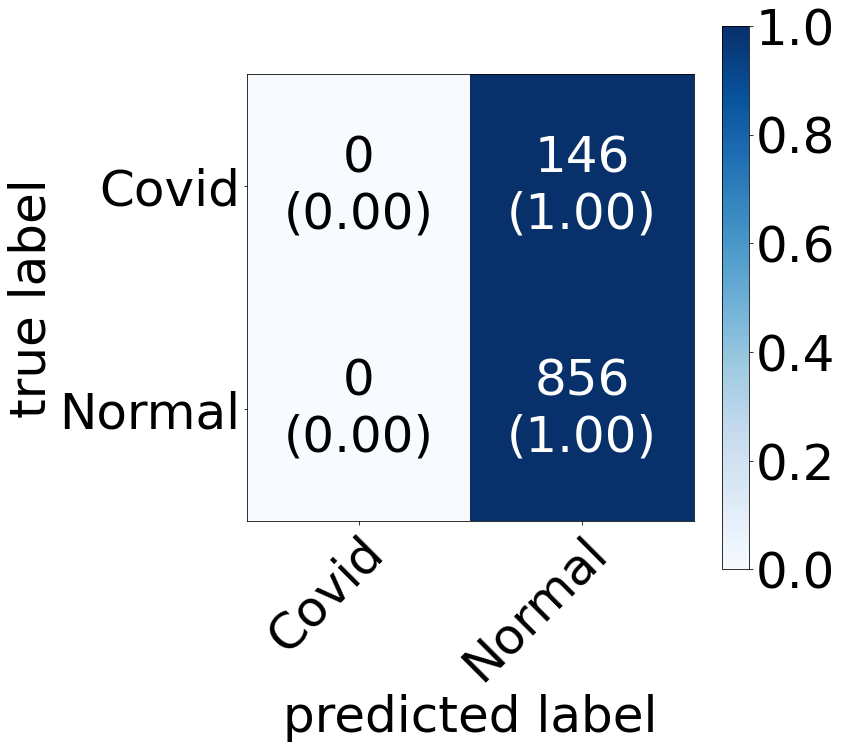

In [ ]:
# Imports

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import plot_confusion_matrix 
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.size']=50

# Your Confusion Matrix
cm = np.array([[tn5, fp5],
               [fn5, tp5]])
#tn4, fp4, fn4, tp4
# Classes
classes = ['Covid', 'Normal']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

## **SVM2**

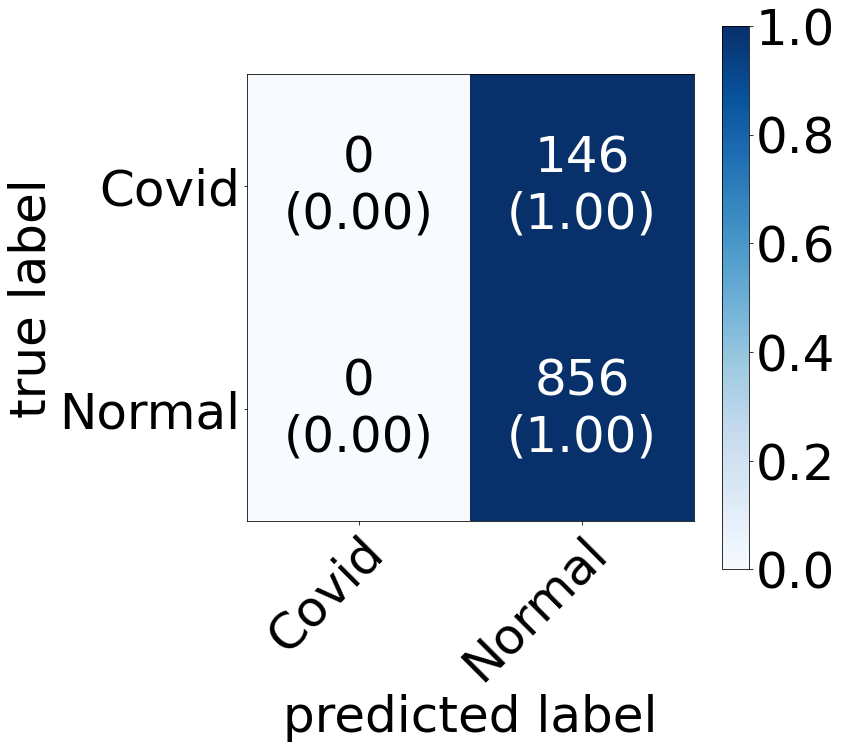

In [ ]:
# Imports

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.metrics import plot_confusion_matrix 
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.size']=50

# Your Confusion Matrix
cm = np.array([[tn6, fp6],
               [fn6, tp6]])
#tn4, fp4, fn4, tp4
# Classes
classes = ['Covid', 'Normal']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

## **Other CONF**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


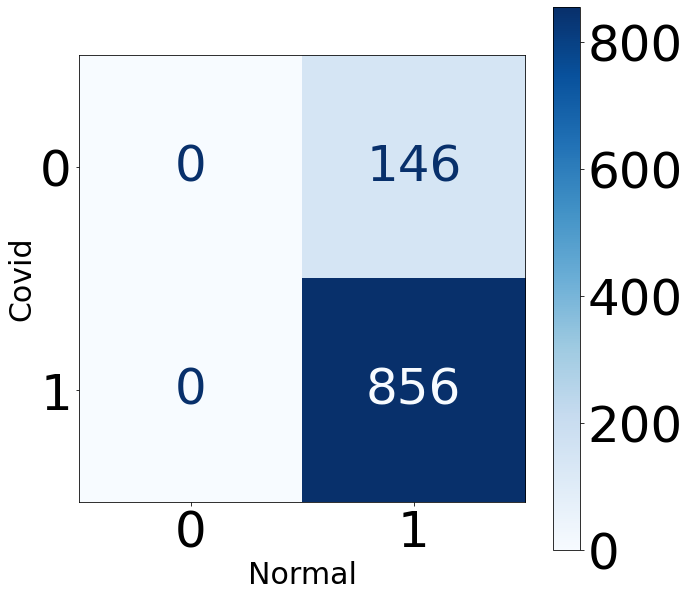

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.size'] = 50

plot_confusion_matrix(svm, X_test, y_test,  cmap='Blues', values_format='d')  
plt.xlabel('Normal', fontsize=30)
plt.ylabel('Covid', fontsize=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


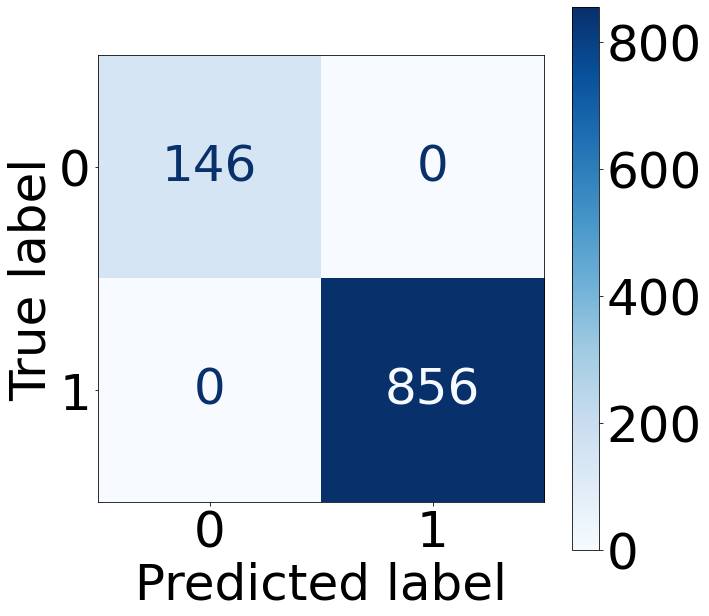

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(knn, X_test, y_test,  cmap='Blues', values_format='d')  
plt.show()